<a href="https://colab.research.google.com/github/cjakuc/DS-Unit2_Build-Week/blob/master/Data%20Cleaning%20and%20Modeling/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [x] Continue to clean and explore your data. 
- [x] For the evaluation metric you chose, what score would you get just by guessing?
- [x] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

Your code starts here:

In [0]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 194kB 5.0MB/s 
     |████████████████████████████████| 614kB 13.2MB/s 
     |████████████████████████████████| 1.5MB 21.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 235kB 36.3MB/s 
     |████████████████████████████████| 307kB 37.3MB/s 
     |████████████████████████████████| 215kB 49.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 747kB 40.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=b6c0b4add41da6b5f9d31d6e756dafea8054a6e58b0d2ed65c9554fa280146ef
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

In [0]:
# Import data
df = pd.read_csv('https://github.com/cjakuc/DS-Unit2_Build-Week/blob/master/Data/BuildWeek2Clean1.csv?raw=true',
                 infer_datetime_format=True,
                 index_col=0)
df.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2005-01-01,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,0,winter,1560.0,48.0,0.0,17.0
2005-01-01,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,1,winter,1490.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,2,winter,1429.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,3,winter,1367.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,4,winter,1325.0,48.0,0.0,17.0


In [0]:
# Create train, val, and test sets
train = df[df['year']<2014]
val = df[df['year']==2014]
test = df[df['year']==2015]

In [0]:
# Get Pandas Profiling Report
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [0]:
# Q. What is the maximum MW in this dataset? 3746
# Q. What is the minimum MW in this dataset? 982

In [0]:
# Q. What are the values of the other variables at the max MW?
train[train['MW']==3746]
# 95th percentile dew point temp
# 93 degrees is >Q3
# Humidity is below mean and median
# Very low sea level pressure
# Similarly low station pressure
# Max visibility
# >Q3 wind direction
# Wind speed higher than mean/median but <Q3
# 4 pm in the summer

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2007-08-08,68.0,93.0,0.0,44.0,29.83,28.79,10.0,320.0,11.0,2007,8,220,15,summer,3746.0,86.0,21.0,0.0


In [0]:
# Q. What are the values of the other variables at the min MW?
train[train['MW']==982]
# 95th percentile dew point temp
# 66.66 degrees is between median and Q3
# Humidity is >Q3
# Very low sea level pressure
# Similarly low station pressure
# Q1 visibility
# ~ Q3 wind direction
# >95th percentile wind speed
# 7 pm in the fall

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2008-09-14,62.333333,66.666667,NaN,84.666667,29.73,28.666667,9.0,263.333333,23.0,2008,9,258,18,fall,982.0,75.0,10.0,0.0


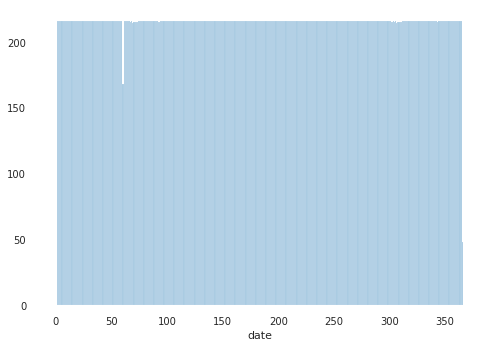

In [0]:
# What to do about leap days?
# Leave them in?: Yes
  # might affect lagged variables and using 'date' as a predictor
# Take them out entirely?:
  # Wouldn't be as accurate

# Check out the distribution of the dates
sns.distplot(train['date'],kde=False,bins=366);
# Drop off is probably leap day

In [0]:
# What to do with missing values?
  # Highest % is precipitation (9.4%)
    # Mostly zeros anyway though
    # Second is wind direction (1.2%)
# Could do linear interpolation from nearest neighbors
  # How many missing values are consecutive though?

# Let's try it
def interpolate_missing(df):
  for col in df.columns:
    df = df.copy()
    df[col] = df[col].interpolate(method='linear')
  return df

In [0]:
# Interpolate subsets
train = interpolate_missing(train)
val = interpolate_missing(val)
test = interpolate_missing(test)

In [0]:
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

# profile

# Distributions look the same

# Check baseline MAE

In [0]:
# Get baseline MAE
target = 'MW'
guess_train = train[target].mean()
guess_val = val[target].mean()
baseline_train_mae = (guess_train - train[target]).abs().mean()
baseline_val_mae = (guess_val - val[target]).abs().mean()
print(f'Baseline Train MAE: {baseline_train_mae:,.2f}MW\n')
print(f'Baseline Validation MAE: {baseline_val_mae:,.2f}MW')

Baseline Train MAE: 317.08MW

Baseline Validation MAE: 304.69MW


# Fast, first model

In [0]:
# def wrangle(X):
#   """Wrangle train, validate, and test in the same way"""
#   # Started when future wrangling is necessary to create lagged variables, etc.

#   X = X.copy()

#   return X

# # Wrangle train, val, and test
# train = wrangle(train)
# val = wrangle(val)
# test = wrangle(test)

In [0]:
# TODO: Incorporate the regression and coefficient plotting in this function
# Pipe, build, fit, and validate the model
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

def full_pipe(train,val):
  """Define a function that selects features, pipes, encodes,
     and fits a linear regression 
     Returns the pipeline and features"""

  # Select target
  target = 'MW'
  # Drop target from features
  features = train.drop(columns=['MW']).columns.tolist()

  # Arrange X features matrix & y target vector
  X_train = train[features]
  y_train = train[target]
  X_val = val[features]
  y_val = val[target]

  # Pipeline
  pipeline = make_pipeline(
      ce.OneHotEncoder(),
      LinearRegression()
  )

  pipeline.fit(X_train, y_train)
  print('Train MAE', mean_absolute_error(y_train,pipeline.predict(X_train)))
  print('Validation MAE', mean_absolute_error(y_val,pipeline.predict(X_val)))

  return pipeline, features

In [0]:
pipeline, features = full_pipe(train,val)
# MAE is much better than baseline

Train MAE 203.25294309824812
Validation MAE 213.64916650632205


# Plot actual vs predicted MW for validation data

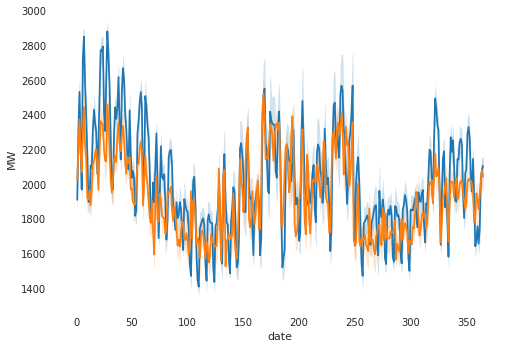

In [0]:
sns.lineplot(x=val['date'],y=val['MW'])
sns.lineplot(x=val['date'],y=pipeline.predict(val[features]));

# Plot residuals

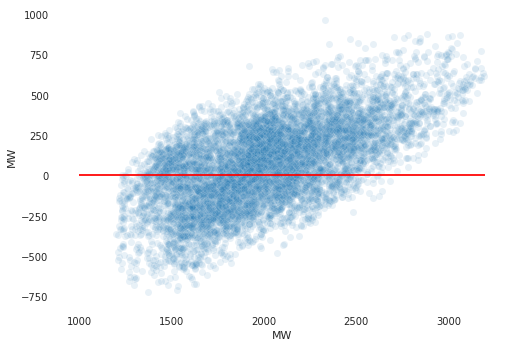

In [0]:
errors = (val[target] - pipeline.predict(val[features]))
sns.scatterplot(x=val[target],y=errors,alpha=0.1)
# Add a horizontal line at residuals = 0
plt.hlines(y=0,xmin=1000,xmax=3200,color='red');
# There is a clear trend in the residuals
  # Worse at predicting low and high values of MW
  # Possible log transformation of target could help

# Plot coefficients

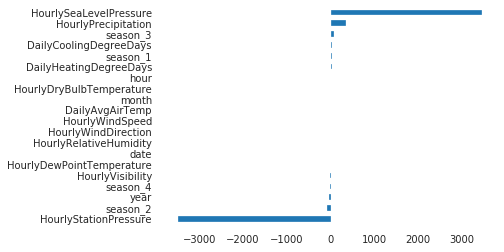

In [0]:
%matplotlib inline
model = pipeline.named_steps['linearregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(val[features]).columns
coefficients = pd.Series(model.coef_, encoded_columns)
coefficients.sort_values().plot.barh();
# Both the pressures are about equally strong in opposite directions...
  # They looked very similar in exploration
    # Should probably only include station pressure:
      # More relevant to an airport in a landlocked state
      # I could alternatively take the average of the two
# Temperature, hour, date, all look really insignificant which is surprising
  # Could just be because both pressure values throw off the scale

# Rerun the model with only one pressure variable

In [0]:
# TODO: Incorporate the regression and coefficient plotting in this function
# Pipe, build, fit, and validate the model
def full_pipe(train,val):
  """Define a function that selects features, pipes, encodes,
     and fits a linear regression 
     Returns the pipeline and features"""

  # Select target
  target = 'MW'
  # Drop target from features
  features = train.drop(columns=['MW','HourlySeaLevelPressure']).columns.tolist()

  # Arrange X features matrix & y target vector
  X_train = train[features]
  y_train = train[target]
  X_val = val[features]
  y_val = val[target]

  # Pipeline
  pipeline = make_pipeline(
      ce.OneHotEncoder(),
      LinearRegression()
  )

  pipeline.fit(X_train, y_train)
  print('Train MAE', mean_absolute_error(y_train,pipeline.predict(X_train)))
  print('Validation MAE', mean_absolute_error(y_val,pipeline.predict(X_val)))

  return pipeline, features

In [0]:
pipeline, features = full_pipe(train,val)

Train MAE 204.34748264654743
Validation MAE 215.37322801067168


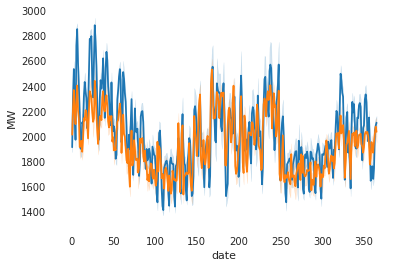

In [0]:
sns.lineplot(x=val['date'],y=val['MW'])
sns.lineplot(x=val['date'],y=pipeline.predict(val[features]));
# Kind of an unecessary figure at this point, drop in future iterations

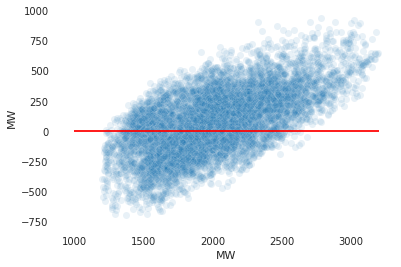

In [0]:
errors = (val[target] - pipeline.predict(val[features]))
sns.scatterplot(x=val[target],y=errors,alpha=0.1)
# Add a horizontal line at residuals = 0
plt.hlines(y=0,xmin=1000,xmax=3200,color='red');
# There is a clear trend in the residuals
  # Worse at predicting low and high values of MW
  # Possible log transformation of target could help

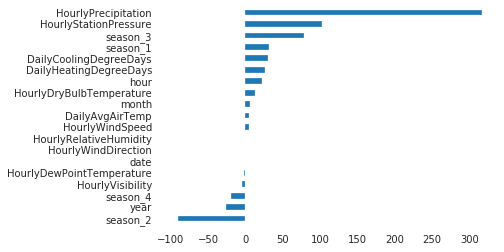

In [0]:
%matplotlib inline
model = pipeline.named_steps['linearregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(val[features]).columns
coefficients = pd.Series(model.coef_, encoded_columns)
coefficients.sort_values().plot.barh();
# Precipitation is surprisinlgy impactful
  # Maybe people stay inside and use elctricity when it rains/snows?
# Station pressure is surpringly impactful still
# Hour and temp showing more importance now

# Rerun the model after log transforming the target variable MW

In [0]:
from sklearn.compose import TransformedTargetRegressor
# Pipe, build, fit, and validate the model
def full_pipe(train,val):
  """Define a function that selects features, pipes, encodes,
     and fits a linear regression to a log transformed target
     Returns the pipeline and features"""

  # Select target
  target = 'MW'
  # Drop target from features
  features = train.drop(columns=['MW','HourlySeaLevelPressure']).columns.tolist()

  # Arrange X features matrix & y target vector
  X_train = train[features]
  y_train = train[target]
  X_val = val[features]
  y_val = val[target]

  # Pipeline
  pipeline = make_pipeline(
      ce.OneHotEncoder(),
      TransformedTargetRegressor(regressor=LinearRegression(),
                                 func=np.log1p,
                                 inverse_func=np.expm1)
  )

  pipeline.fit(X_train, y_train)
  print('Train MAE', mean_absolute_error(y_train,pipeline.predict(X_train)))
  print('Validation MAE', mean_absolute_error(y_val,pipeline.predict(X_val)))
  print(f'Train R^2 Score: {pipeline.score(X_train,y_train)}')
  print(f'Validation R^2 Score: {pipeline.score(X_val,y_val)}\n')

  # Plot the residuals
  errors = (val[target] - pipeline.predict(val[features]))
  sns.scatterplot(x=val[target],y=errors,alpha=0.1)
  # Add a horizontal line at residuals = 0
  plt.hlines(y=0,xmin=1000,xmax=3200,color='red');
  plt.title('Residuals vs Validation Target')
  plt.ylabel('Residuals (MW)')
  plt.xlabel('Validation Target (MW)')
  plt.show()

  # Plot the coefficients
  %matplotlib inline
  model = pipeline.named_steps['transformedtargetregressor'] #Pull out transregressor
  model = model.regressor_ #Pull out linear regressor
  encoder = pipeline.named_steps['onehotencoder'] #Pull out encoder
  encoded_columns = encoder.transform(val[features]).columns #Pull out encoded columns
  coefficients = pd.Series(model.coef_, encoded_columns) #Pull out coefficients
  coefficients.sort_values().plot.barh()
  plt.title('Model Coefficients')
  plt.xlabel('Values')
  plt.ylabel('Coefficients')
  plt.show();

  # Plot the residuals vs the actual
  import matplotlib.lines as mlines
  blue_line = mlines.Line2D([],[],color='#2077B4',
                            linewidth=3)
  orange_line = mlines.Line2D([],[],color='#FC7F0F',
                              linewidth=3)
  sns.lineplot(x=val['date'],y=val['MW'])
  sns.lineplot(x=val['date'],y=pipeline.predict(val[features]))
  plt.title('Actual vs Predicted Values')
  # Create the legend
  plt.legend(handles=[blue_line,
                      orange_line],
             labels=['Actual',
                     'Predicted']);

  return pipeline, features

Train MAE 202.87288337111585
Validation MAE 212.94762336341873
Train R^2 Score: 0.6131505568525005
Validation R^2 Score: 0.5135529002385932



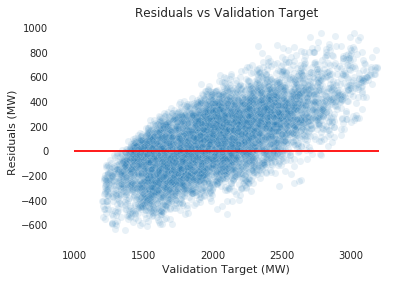

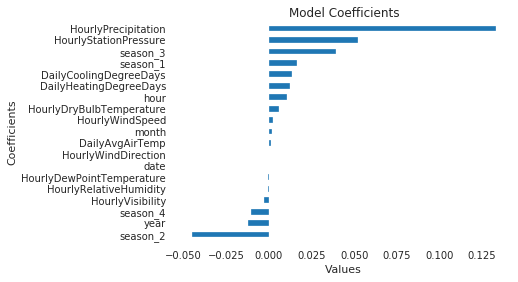

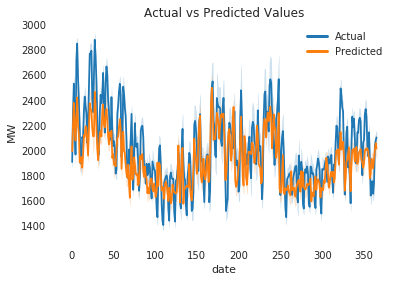

In [0]:
pipeline, features = full_pipe(train,val)
# Log transforming the target improved the MAE slightly

# TODO for the future:

Feature Engineering
- Lag the daily variables to prevent leakage and make it more real world applicable
- Add lagged variables for the hourly variables
  - Daily and yearly
- Add weekend or non-weekend variable
- Add holidays variable for holidays with large affect on MW
- Add interactions between hours and seasons
- Drop year?
- One hot encode hour

Trend in residuals
- Do the lagged variables
- Watch the time series videos that Peyton recommended

Modelling
- Try a random forest model
- Try a LOESS regression
  - On a daily seasonality
  - On a seasonal seasonality

In [0]:
df_interpolated = interpolate_missing(df)

In [0]:
df_interpolated.to_csv('BuildWeek2FinalData.csv')